In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import pickle
import random

In [4]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [5]:
# check for null values in each feature
for feature in df.columns:
    nullvalues = df[feature].isnull().sum()
    print(f"{feature} has {nullvalues} null-values")

T has 0 null-values
TM has 0 null-values
Tm has 0 null-values
SLP has 0 null-values
H has 0 null-values
VV has 0 null-values
V has 0 null-values
VM has 0 null-values
PM 2.5 has 1 null-values


<AxesSubplot:>

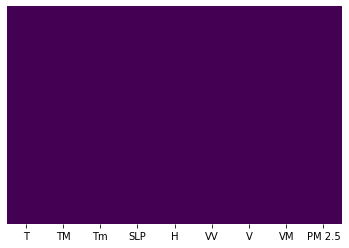

In [6]:
# check for null values throutgh Heat map
sn.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
df = df.dropna()
for feature in df.columns:
    nullvalues = df[feature].isnull().sum()
    print(f"{feature} has {nullvalues} null-values")

T has 0 null-values
TM has 0 null-values
Tm has 0 null-values
SLP has 0 null-values
H has 0 null-values
VV has 0 null-values
V has 0 null-values
VM has 0 null-values
PM 2.5 has 0 null-values


In [8]:
# Divide the dataframe into dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X.head()

,T,TM,Tm,SLP,H,VV,V,VM
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2


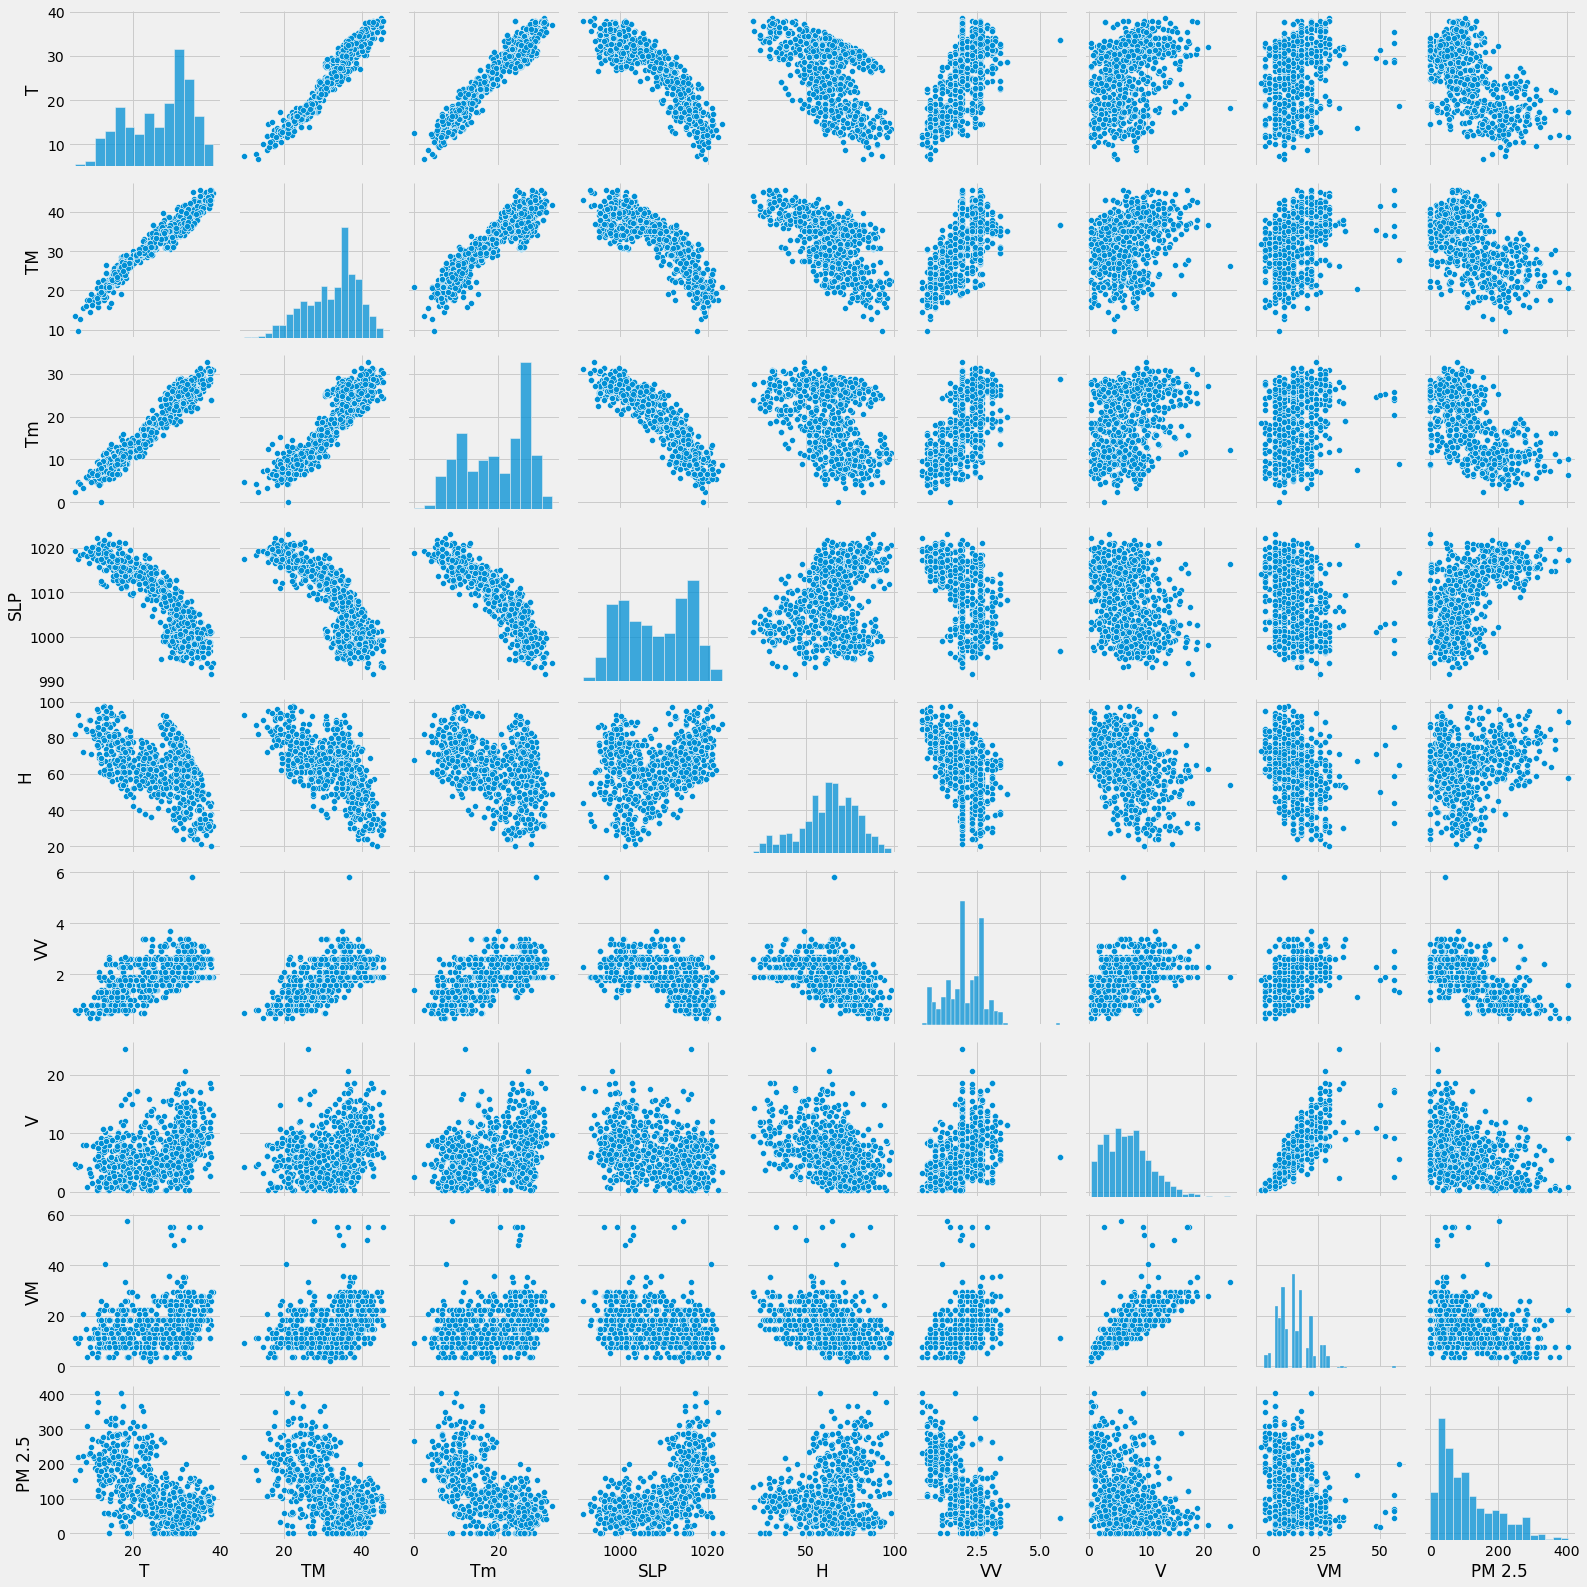

In [10]:
# Do multivariate analysis
plt.style.use('fivethirtyeight')
sn.pairplot(df)

In [11]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


### Correlation:
 * It is two types:
    1. Positive -> How much does one increase on increase of other
    2. negative -> How much does other increase on increase other

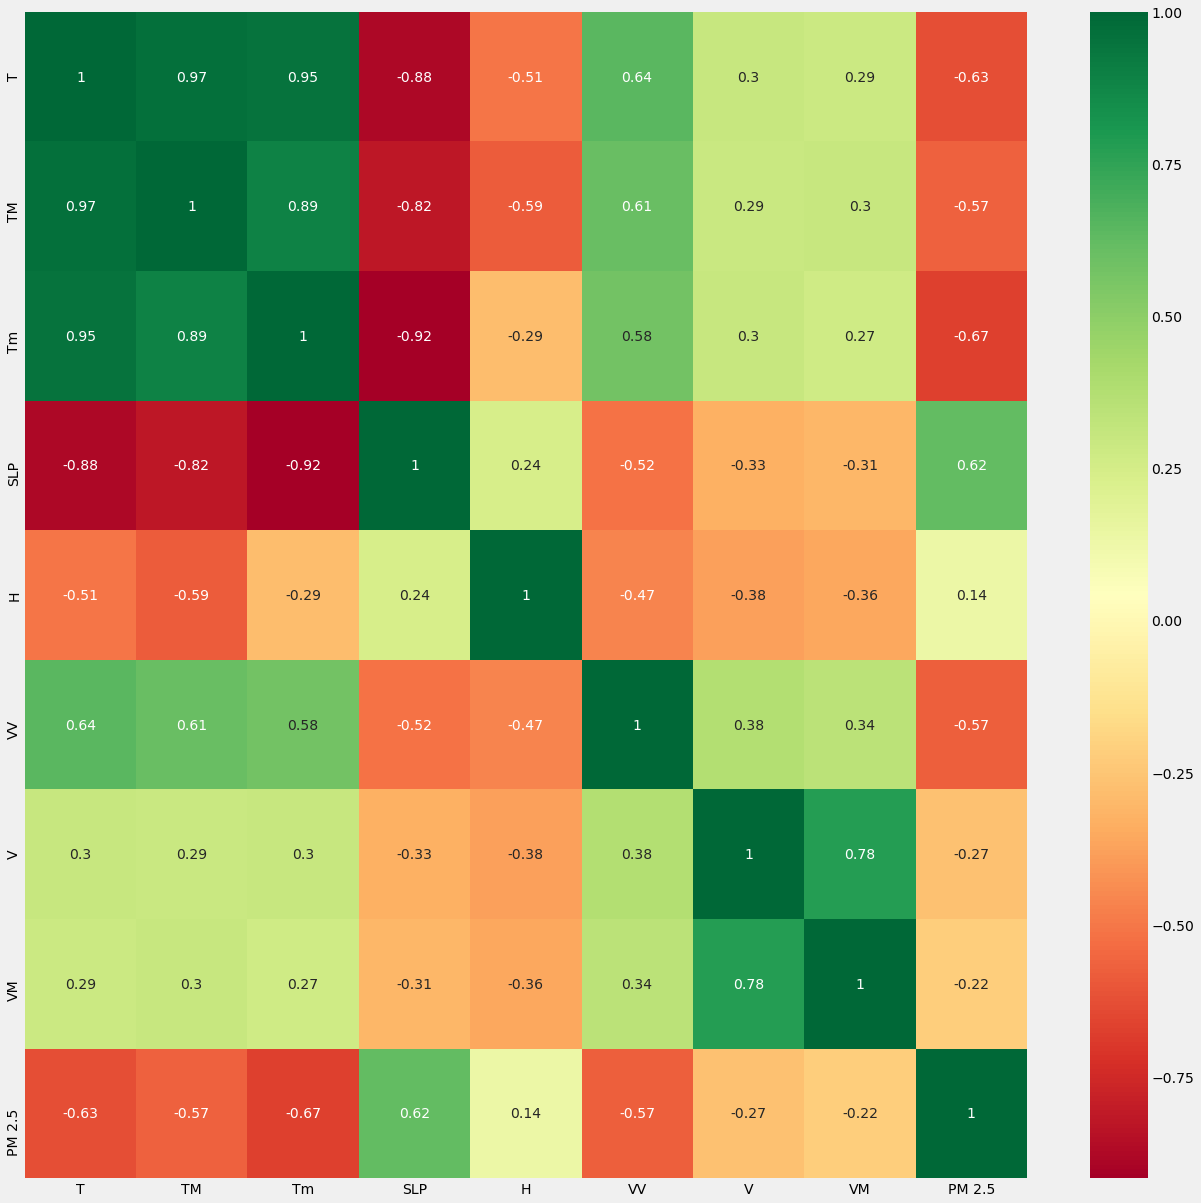

In [12]:
# plot the correlation using heat-map
cormat = df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20, 20))
sn.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

* T	Average annual temperature
* TM	Annual average maximum temperature
* Tm	Average annual minimum temperature
* PP	Rain or snow precipitation total annual
* V	Annual average wind speed
* RA	Number of days with rain
* SN	Number of days with snow
* TS	Number of days with storm
* FG	Number of foggy days
* TN	Number of days with tornado
* GR	Number of days with hail

## Feature-Importance:
 * we can know which feature is very important for us to use in our model building, Inorder to get feature we can use sklearn inbuilt Extra Tree Regressor

In [13]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [14]:
print(model.feature_importances_)

[0.15184435 0.09304838 0.22569355 0.15179042 0.09147676 0.19356805
 0.0525639  0.0400146 ]


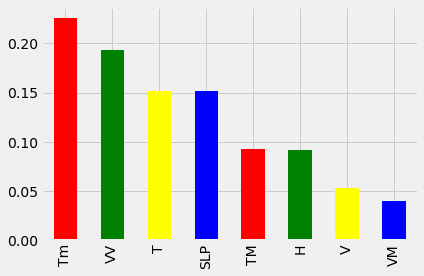

In [15]:
# plot the feature importances

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind="bar", color = ["red", "green", "yellow", "blue"])
plt.show()

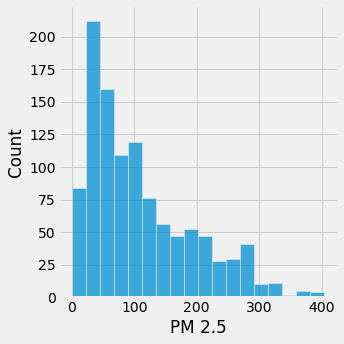

In [16]:
# Let's see the distribution of output feature
sn.displot(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

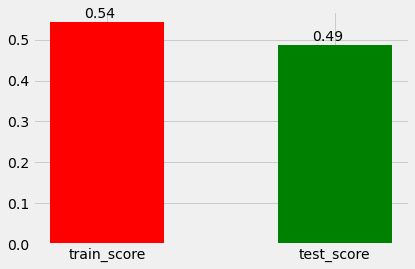

In [19]:
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
scores = [train_score, test_score]
plt.bar(["train_score" , "test_score"],scores, width=0.5, color=["red", "green"])
for index, value in enumerate(scores):
    plt.text(index-0.1, value + 0.01, str(round(value,2)))

In [20]:
# lets try cross validation
score = cross_val_score(lr_model, X, y, cv=5)

In [21]:
print(score.mean())

0.4710569304807393


In [22]:
# Mdoel evaluation

coeff_df = pd.DataFrame(lr_model.coef_,
                       index = X.columns,
                       columns=['Coefficent'])
coeff_df

,Coefficent
T,-2.694171
TM,1.429622
Tm,-4.569212
SLP,0.225523
H,-1.094828
VV,-38.010079
V,-1.849483
VM,0.491486


### Interpreting the coefficents:
 * Holdind all other features fixed, a 1 unit increase in T causes -1.8 decrease in pm.
 * Holdind all other features fixed, a 1 unit increase in TM causes 1.01 increase in pm.
 * similarly it happens for all other features

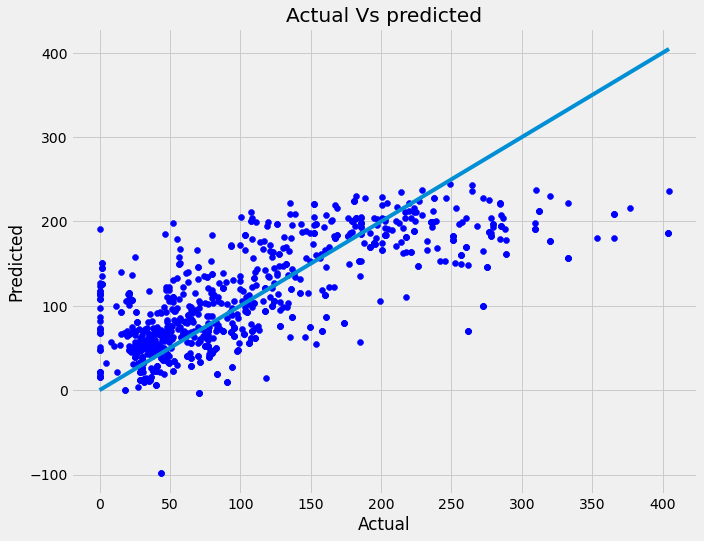

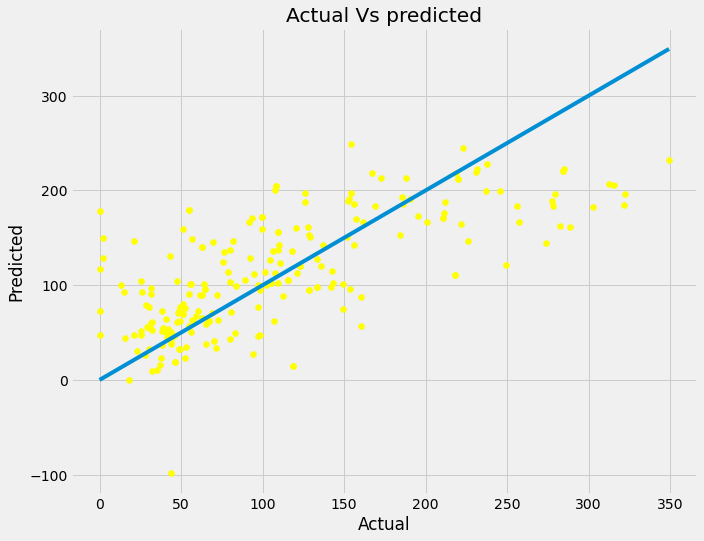

In [52]:
# let's plot fitted lines of train and test datasets
train_predict = lr_model.predict(X_train)
test_predict = lr_model.predict(X_test)
predictions = [train_predict, test_predict]
data = [y_train, y_test]
colors = ["green", "yellow", "blue", "balck"]
for i in range(len(predictions)):
    plt.figure(figsize=(10, 8))
    plt.style.use('fivethirtyeight')
    plt.scatter(data[i], predictions[i], color=random.choice(colors))
    plt.plot([data[i].min(), data[i].max()], [data[i].min(), data[i].max()])
    plt.title("Actual Vs predicted")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")

In [53]:
# saving the model
with open('Linear.pkl', 'wb') as file:
    pickle.dump(lr_model, file)